In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#Loading ml modules
from sklearn import svm, metrics
from sklearn.neural_network import MLPClassifier
#scores
from sklearn.metrics import accuracy_score, confusion_matrix
#visualization plots 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [108]:
def svm_model(X_train, y_train):
    """Modelling the svm model"""
    classifier = svm.SVC()
    return classifier.fit(X_train, y_train)
def simple_neural_network(X_train, y_train):
    classifier = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=10000)
    return classifier.fit(X_train, y_train)
def model_plot(X_train, y_train, model):


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    ## Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

In [96]:
TEST_SIZE = 0.2

#Reading data and separating into features and labels
df = pd.read_csv('q3.csv', header=None).values
X = df[:, :-1]
y = df[:, -1]
#Seperating the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE)
#Modeling
svm_mod = svm_model(X_train, y_train)
nn_mod = simple_neural_network(X_train, y_train)
#Prediction
svm_pred = svm_mod.predict(X_test)
nn_pred = nn_mod.predict(X_test)

print('Accuracy scores for all 54 features')
print('SVM score: ', accuracy_score(y_test, svm_pred))
print("SVM conf matrix:\n", confusion_matrix(y_test, svm_pred))
print('SVM classification report: \n', metrics.classification_report(y_test, svm_pred))

print()
print('Neural Networks score: ', accuracy_score(y_test, nn_pred))
print("NN conf matrix: \n", confusion_matrix(y_test, nn_pred))
print('NN classification report: \n', metrics.classification_report(y_test, nn_pred))



Accuracy scores for all 54 features
SVM score:  0.9705882352941176
SVM conf matrix:
 [[15  0]
 [ 1 18]]
SVM classification report: 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        15
         1.0       1.00      0.95      0.97        19

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34


Neural Networks score:  0.9411764705882353
NN conf matrix: 
 [[14  1]
 [ 1 18]]
NN classification report: 
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        15
         1.0       0.95      0.95      0.95        19

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34



### Part b

run the models on first two features and plot the Decision boundaries

Accuracy scores for first 2 features
SVM score:  0.8529411764705882
SVM conf matrix:
 [[15  3]
 [ 2 14]]
SVM classification report: 
               precision    recall  f1-score   support

         0.0       0.88      0.83      0.86        18
         1.0       0.82      0.88      0.85        16

    accuracy                           0.85        34
   macro avg       0.85      0.85      0.85        34
weighted avg       0.85      0.85      0.85        34


Neural Networks score:  0.8529411764705882
NN conf matrix: 
 [[15  3]
 [ 2 14]]
NN classification report: 
               precision    recall  f1-score   support

         0.0       0.88      0.83      0.86        18
         1.0       0.82      0.88      0.85        16

    accuracy                           0.85        34
   macro avg       0.85      0.85      0.85        34
weighted avg       0.85      0.85      0.85        34



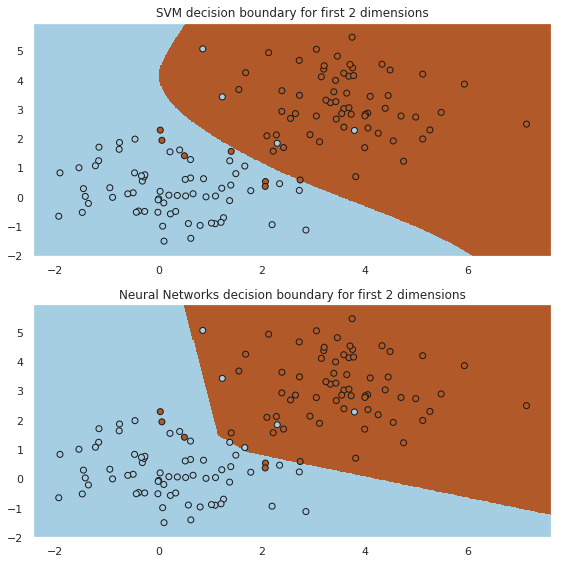

In [119]:
TEST_SIZE = 0.2

#Reading data and separating into features and labels
df = pd.read_csv('q3.csv', header=None).values
X = df[:, :2]
y = df[:, -1]
#Seperating the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE)
#Modeling
svm_mod = svm_model(X_train, y_train)
nn_mod = simple_neural_network(X_train, y_train)
#Prediction
svm_pred = svm_mod.predict(X_test)
nn_pred = nn_mod.predict(X_test)

print('Accuracy scores for first 2 features')
print('SVM score: ', accuracy_score(y_test, svm_pred))
print("SVM conf matrix:\n", confusion_matrix(y_test, svm_pred))
print('SVM classification report: \n', metrics.classification_report(y_test, svm_pred))

print()
print('Neural Networks score: ', accuracy_score(y_test, nn_pred))
print("NN conf matrix: \n", confusion_matrix(y_test, nn_pred))
print('NN classification report: \n', metrics.classification_report(y_test, nn_pred))


##plotting the boundaries
f = plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.title('SVM decision boundary for first 2 dimensions')
model_plot(X_train, y_train, svm_mod)
plt.subplot(2, 1, 2)
plt.title('Neural Networks decision boundary for first 2 dimensions')
model_plot(X_train, y_train, nn_mod)
plt.tight_layout()
plt.show()